# Polynomial Regression
> Documentation: https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Try linear simple regression first

### Prepare independent variable

In [21]:
x = np.random.uniform(-3, 3,(100)).reshape(-1,1)

### Prepare dependent variable

In [22]:
y = x * x - x - 1
error = np.random.rand((100)).reshape(-1, 1)
y = y + error*2
y = y.reshape(-1, 1)

### Simple visualization

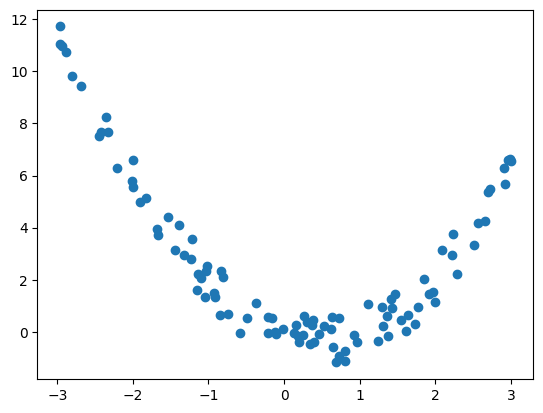

In [23]:
plt.scatter(x, y)

### Split train and test data

In [24]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

### Train the model

In [25]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model = reg.fit(x_train, y_train)

In [26]:
model.coef_, model.intercept_

(array([[-0.84541517]]), array([2.72343055]))

### Evaluate the model

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 2.7050964291043655 MSE: 8.22603426094628 RMSE: 2.868106389405086 R^2 0.0913959729699606


### Visualiza your result

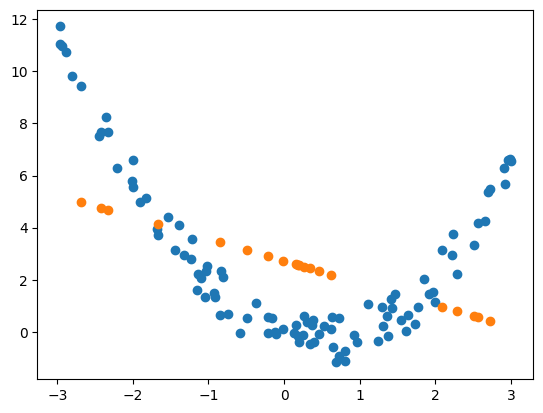

In [28]:
plt.scatter(x, y)
plt.scatter(x_test, y_pred)

### Not so good, isn't it?

## Try polinomial features



In [29]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_train = poly.fit_transform(x_train.reshape(-1, 1))
poly_test = poly.fit_transform(x_test.reshape(-1, 1))

In [31]:
poly_train

array([[ 1.00000000e+00, -1.21969425e+00,  1.48765407e+00],
       [ 1.00000000e+00, -3.69662985e-01,  1.36650722e-01],
       [ 1.00000000e+00, -2.35481836e+00,  5.54516950e+00],
       [ 1.00000000e+00,  1.99644945e+00,  3.98581039e+00],
       [ 1.00000000e+00, -1.38854866e+00,  1.92806739e+00],
       [ 1.00000000e+00, -1.13657568e+00,  1.29180427e+00],
       [ 1.00000000e+00,  3.42694604e-01,  1.17439592e-01],
       [ 1.00000000e+00,  1.82773174e-01,  3.34060331e-02],
       [ 1.00000000e+00, -9.32177349e-01,  8.68954610e-01],
       [ 1.00000000e+00, -1.83073621e+00,  3.35159507e+00],
       [ 1.00000000e+00,  2.91043277e+00,  8.47061891e+00],
       [ 1.00000000e+00, -4.88010619e-01,  2.38154365e-01],
       [ 1.00000000e+00, -8.64833563e-03,  7.47937092e-05],
       [ 1.00000000e+00,  1.55091342e+00,  2.40533243e+00],
       [ 1.00000000e+00, -1.99201530e+00,  3.96812497e+00],
       [ 1.00000000e+00,  5.33803902e-01,  2.84946605e-01],
       [ 1.00000000e+00, -8.28529284e-01

### Train the model with polynomial features

In [32]:
from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_train, y_train)

LinearRegression()

### Evaluate the model

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y_pred = poly_reg_model.predict(poly_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 0.39897424716689717 MSE: 0.22466684994348615 RMSE: 0.4739903479433797 R^2 0.9596978093663853


### Visualize the model

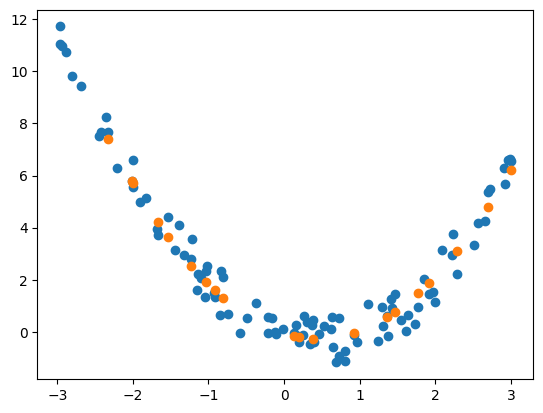

In [34]:
plt.scatter(x, y)
plt.scatter(x_test, y_pred)

### Much better! Isn't it?
Is the degree higher, the result better? How about we do degree as 51?

In [62]:
poly = PolynomialFeatures(degree=51)
poly_train = poly.fit_transform(x_train.reshape(-1, 1))
poly_test = poly.fit_transform(x_test.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_train, y_train)
y_pred = poly_reg_model.predict(poly_train)
mae = mean_absolute_error(y_true=y_train,y_pred=y_pred)
mse = mean_squared_error(y_true=y_train,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_train,y_pred=y_pred,squared=False)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print('''Training:
          MAE: {}
          MSE: {}
          RMSE: {}
          R^2 {}'''.format(mae, mse, rmse, r2))

y_pred = poly_reg_model.predict(poly_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('''Testing:
          MAE: {}
          MSE: {}
          RMSE: {}
          R^2 {}'''.format(mae, mse, rmse, r2))

Training: 
          MAE: 0.9300192606660586 
          MSE: 1.7181920444211911 
          RMSE: 1.3107982470316288 
          R^2 0.8398154972074873
Testing: 
          MAE: 1.62949110030523 
          MSE: 4.890215068197883 
          RMSE: 2.2113830668154 
          R^2 0.12276163587346123


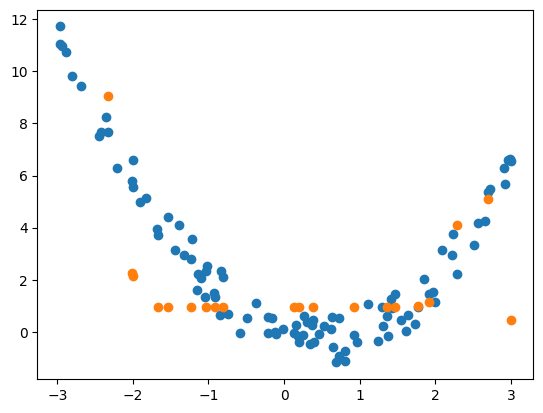

In [63]:
plt.scatter(x, y)
plt.scatter(x_test, y_pred)

### Nope!
High degree polynomial regression may result in Overfitting -- Training result is better, but testing result is poor!